In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
afmdata=np.genfromtxt('afm-data.txt')
afmdata= afmdata*(10**9)
height, width = afmdata.shape
afmimg=np.zeros((height, width, 3))

In [12]:
factor=(255)/(afmdata.max()-afmdata.min())
for i in range(height):
    for j in range(width):
        intensity=np.int((afmdata[i][j]-afmdata.min())*factor)
        #afmimg[i][j]=np.array([np.int((afmdata[i][j]-afmdata.min())*factor),0,0])
        afmimg[i][j]=np.array([intensity, intensity, intensity])

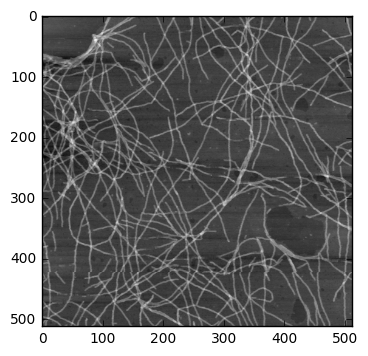

In [13]:
plt.imshow(np.uint8(afmimg))

(<matplotlib.axes._subplots.AxesSubplot at 0x11471ac50>,
 <matplotlib.image.AxesImage at 0x1147aa090>)

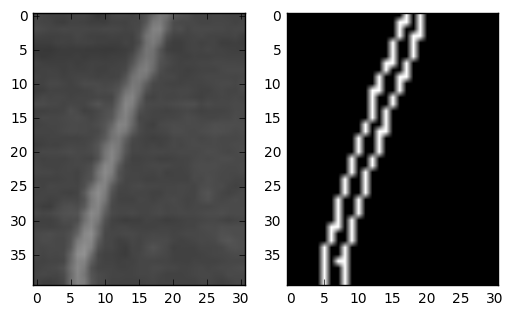

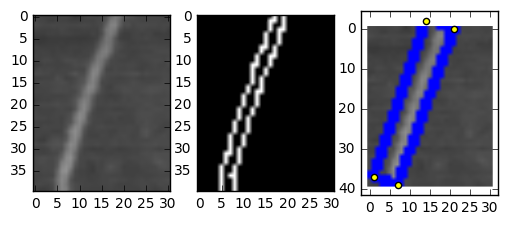

In [84]:
# Cropping out the part that we are interesting in
snip11=np.uint8(afmimg[300:400,300:400][20:60,19:50])
# Plotting the image that interesting to us
plt.subplot(131),plt.imshow(snip11)

# Detecting borders using the Canny algorithm - setting thresholds 
# From the image information - background ~ 69, wire ~100
edges = cv2.Canny(snip11,69,100)
plt.subplot(132),plt.imshow(edges,cmap='gray')
# Locating contours
ret,thresh = cv2.threshold(snip11,80,255,cv2.THRESH_BINARY)

thresh=cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)
derp, contours,hierarchy =cv2.findContours(thresh,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = max(contours, key=cv2.contourArea)
rect = cv2.minAreaRect(cnts)
box = cv2.boxPoints(rect)
box = np.int0(box)
hello=cv2.drawContours(snip11,[box],0,(0,0,255),2)
#hello=cv2.drawContours(snip11, [cnts], 0, (0,255,0), 3)
plt.subplot(133),plt.imshow(hello)
plt.scatter(box[:,0],box[:,1], c='yellow')